In [1]:
import pandas as pd
import numpy as np
import group3lib
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [2]:
df = pd.read_csv('DirectMarketing.csv')
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent
0,Old,Female,Own,Single,Far,47500,0,High,6,755
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304


In [3]:
#---ENCODE CATEGORIES---
    
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown="ignore")

# Age
age = pd.DataFrame(enc.fit_transform(df[["Age"]]).toarray())
age.columns = enc.get_feature_names(["Age"])

# Gender
gender = pd.DataFrame(enc.fit_transform(df[["Gender"]]).toarray())
gender.columns = enc.get_feature_names(["Gender"])

# OwnHome
ownhome = pd.DataFrame(enc.fit_transform(df[["OwnHome"]]).toarray())
ownhome.columns = enc.get_feature_names(["OwnHome"])

# Married
married = pd.DataFrame(enc.fit_transform(df[["Married"]]).toarray())
married.columns = enc.get_feature_names(["Married"])

# Location
location = pd.DataFrame(enc.fit_transform(df[["Location"]]).toarray())
location.columns = enc.get_feature_names(["Location"])
    
# drop old columns
df.drop(["Age", "Gender", "OwnHome", "Married", "Location", "History"], axis=1, inplace=True)

# concat encoded columns
df = pd.concat([df, age, gender, ownhome, married, location], axis=1)
    
    
#---NORMALIZE DATA---
    
# store the column names of df
store_cols = df.columns

# normalize data
min_max_scaler=preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(df)
df_clean = pd.DataFrame(data_scaled, columns=store_cols)

## Elbow Method

In [4]:
def compute_SSE(data, n):
    '''
    function to compute see by testing different values of k clusters
    takes data and number of clusters as arguements
    '''
    sse = {}
    for k in range(1,n+1):   
        # run KMeans function with number of clusters to create, maximum iterations to perform, and apply the data with fit
        km = KMeans(n_clusters=k, max_iter=1000).fit(data)
        # inertia_ is KMeans attribute that is the value of the sum of squared distances of sample to closest cluster center
        sse[k]=km.inertia_
    return(sse)



def format_SSE(sse_values):
    '''
    function to print clusters and SSE value
    takes compute_SSE function as an argument
    '''
    print('Clusters and their SEE Value')
    print('-'*40)
    for k,v in sse_values.items():        
        print('Clusters: {} \tSSE: {}'.format(k,v))
        


def compute_elbow(sse):
    '''
    function to compute the elbow graph with the sse argument
    '''
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Sum of squared errors')
    plt.title('Elbow Test: SSE vs. Number of Clusters')
    plt.show()

Clusters and their SEE Value
----------------------------------------
Clusters: 1 	SSE: 2847.969089939819
Clusters: 2 	SSE: 2228.477789533513
Clusters: 3 	SSE: 1930.5799259778917
Clusters: 4 	SSE: 1759.2646011720851
Clusters: 5 	SSE: 1543.1006539376654
Clusters: 6 	SSE: 1442.6897683814454
Clusters: 7 	SSE: 1347.9913101307425
Clusters: 8 	SSE: 1239.027653024591
Clusters: 9 	SSE: 1171.0614954206321
Clusters: 10 	SSE: 1088.3136688014683


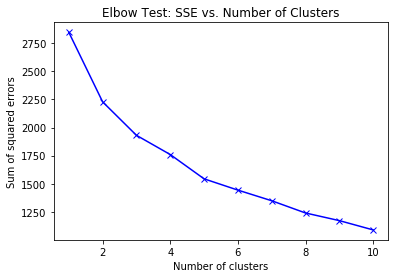

In [5]:
k = 10

sse_value = compute_SSE(df_clean, k)
format_SSE(sse_value)
compute_elbow(sse_value)

## K-Means Clustering

### Cluster into 5 Labels

In [6]:
# initiate k-means
kmeans = KMeans(n_clusters=5).fit(df_clean)

In [7]:
# get cluster labels
cluster_labels = pd.DataFrame(kmeans.labels_)

In [8]:
# add k-means labels to data frame
df_clusters5 = pd.concat((df_clean, cluster_labels), axis=1)
df_clusters5 = df_clusters5.rename({0: 'Cluster_5'}, axis=1)

In [9]:
df_clusters5.head()

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,Cluster_5
0,0.235665,0.000000,0.000000,0.116038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4
1,0.337114,0.000000,0.000000,0.207153,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,3
2,0.021424,0.000000,0.666667,0.041754,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
3,0.475740,0.333333,0.666667,0.388089,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2
4,0.367360,0.000000,0.333333,0.204888,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1


### Cluster into 3 Labels

In [10]:
# initiate k-means
kmeans = KMeans(n_clusters=3).fit(df_clean)

# get cluster labels
cluster_labels = pd.DataFrame(kmeans.labels_)

#### add labels to data frames

In [11]:
# add k-means labels to data frame

# data frame with real values
df_clusters3 = pd.concat((df, cluster_labels), axis=1)
df_clusters3 = df_clusters3.rename({0: 'Cluster_3'}, axis=1)

# data frame with normalized values
df_clusters3_norm = pd.concat((df_clean, cluster_labels), axis=1)
df_clusters3_norm = df_clusters3_norm.rename({0: 'Cluster_3'}, axis=1)

In [12]:
df_clusters3.head()

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,Cluster_3
0,47500,0,6,755,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2
1,63600,0,6,1318,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1
2,13500,0,18,296,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
3,85600,1,18,2436,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,68400,0,12,1304,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2


In [13]:
df_clusters3_norm.head()

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,Cluster_3
0,0.235665,0.000000,0.000000,0.116038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2
1,0.337114,0.000000,0.000000,0.207153,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1
2,0.021424,0.000000,0.666667,0.041754,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
3,0.475740,0.333333,0.666667,0.388089,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0
4,0.367360,0.000000,0.333333,0.204888,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2


### Graphs

#### 5 clusters

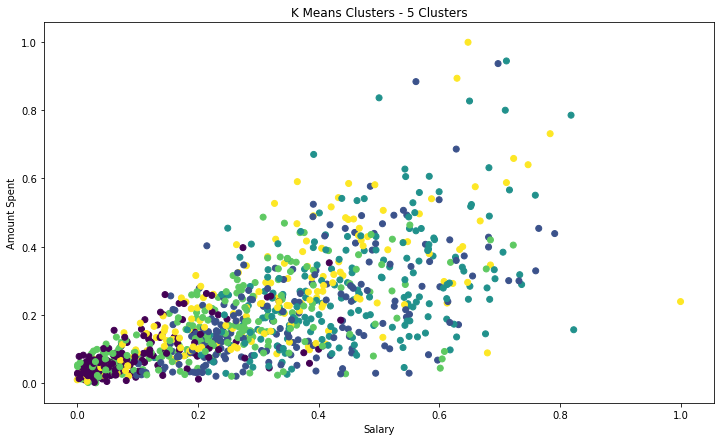

In [14]:
salary = df_clusters5['Salary']
amount_spent = df_clusters5['AmountSpent']

fig, ax = plt.subplots(figsize = (12,7))

ax.scatter(salary, amount_spent, c=df_clusters5['Cluster_5'])

ax.set_title('K Means Clusters - 5 Clusters')
ax.set_ylabel('Amount Spent')
ax.set_xlabel('Salary')

plt.show()

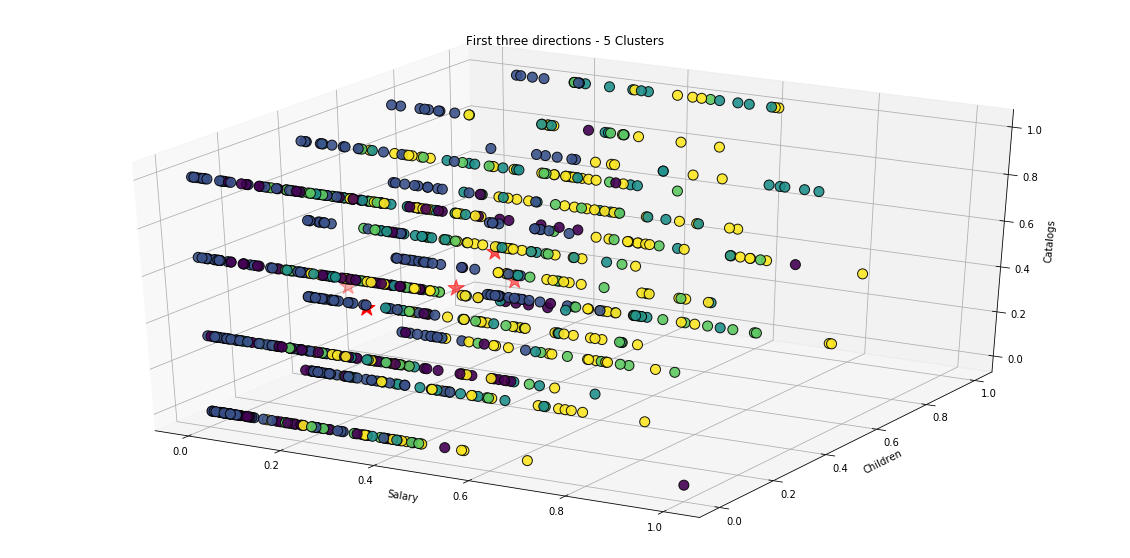

In [15]:
# create array from dataframe
df_array = df_clean.to_numpy()

# initiate k-means
kmeans_ = KMeans(n_clusters=5)
# fit the data
y_kmeans_ = kmeans_.fit_predict(df_array)

# plot the k-means clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_array[:,0],df_array[:,1],df_array[:,2],
          c=y_kmeans_, cmap='viridis',
          edgecolor='k', s=100, alpha=0.9)
ax.set_title("First three directions - 5 Clusters")
ax.set_xlabel("Salary")
ax.set_ylabel("Children")
ax.set_zlabel("Catalogs")
ax.dist = 10

ax.scatter(kmeans_.cluster_centers_[:,0],kmeans_.cluster_centers_[:,1],kmeans_.cluster_centers_[:,2],
          s=300, c='r', marker='*', label='Centroid')

plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

#### 3 clusters

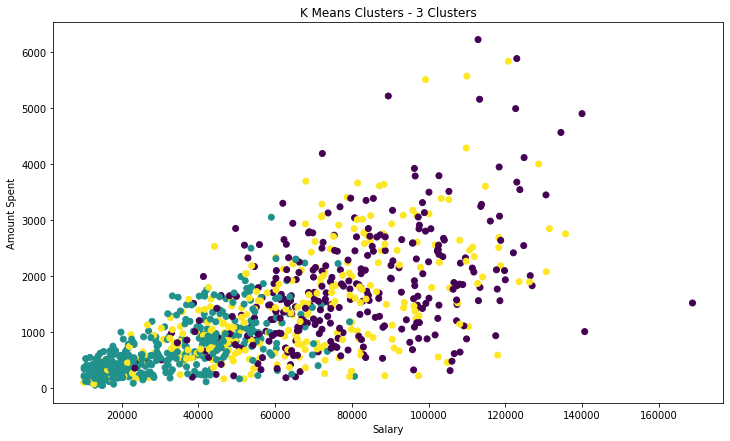

In [16]:
salary = df_clusters3['Salary']
amount_spent = df_clusters3['AmountSpent']

fig, ax = plt.subplots(figsize = (12,7))

ax.scatter(salary, amount_spent, c=df_clusters3['Cluster_3'])

ax.set_title('K Means Clusters - 3 Clusters')
ax.set_ylabel('Amount Spent')
ax.set_xlabel('Salary')

plt.show()

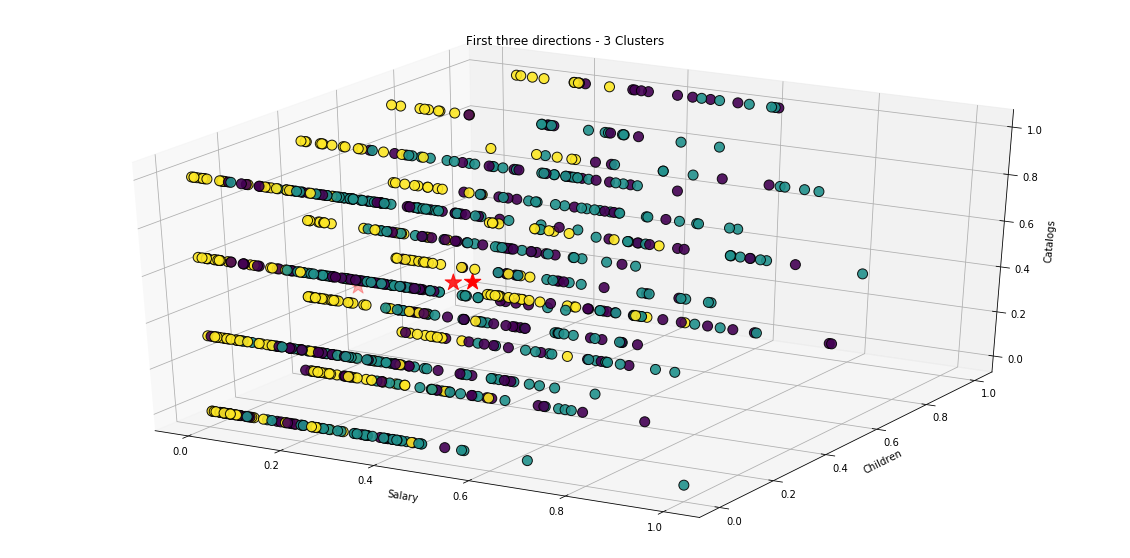

In [17]:
# create array from dataframe
df_array = df_clean.to_numpy()

# initiate k-means
kmeans_ = KMeans(n_clusters=3)
# fit the data
y_kmeans_ = kmeans_.fit_predict(df_array)

# plot the k-means clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_array[:,0],df_array[:,1],df_array[:,2],
          c=y_kmeans_, cmap='viridis',
          edgecolor='k', s=100, alpha=0.9)
ax.set_title("First three directions - 3 Clusters")
ax.set_xlabel("Salary")
ax.set_ylabel("Children")
ax.set_zlabel("Catalogs")
ax.dist = 10

ax.scatter(kmeans_.cluster_centers_[:,0],kmeans_.cluster_centers_[:,1],kmeans_.cluster_centers_[:,2],
          s=300, c='r', marker='*', label='Centroid')

plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

# Cluster Interpretation

In [18]:
cluster1 = df_clusters3[df_clusters3['Cluster_3']==0]
cluster2 = df_clusters3[df_clusters3['Cluster_3']==1]
cluster3 = df_clusters3[df_clusters3['Cluster_3']==2]

In [19]:
# describe cluster 1
cluster1.describe()

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,Cluster_3
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.0,315.0,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.0
mean,79344.126984,0.920635,15.809524,1752.939683,0.761905,0.222222,0.015873,0.0,1.0,0.850794,0.149206,0.758730,0.241270,0.714286,0.285714,0.0
std,23903.156298,1.051259,6.486775,1003.927418,0.426595,0.416401,0.125183,0.0,0.0,0.356859,0.356859,0.428534,0.428534,0.452473,0.452473,0.0
min,15400.000000,0.000000,6.000000,177.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,62250.000000,0.000000,12.000000,1011.500000,1.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,76700.000000,1.000000,18.000000,1583.000000,1.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0
75%,97000.000000,2.000000,24.000000,2307.500000,1.000000,0.000000,0.000000,0.0,1.0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0
max,168800.000000,3.000000,24.000000,6217.000000,1.000000,1.000000,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [20]:
cluster2.describe()

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,Cluster_3
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.0
mean,31700.982801,0.963145,13.488943,654.375921,0.257985,0.063882,0.678133,0.560197,0.439803,0.076167,0.923833,0.169533,0.830467,0.692875,0.307125,1.0
std,16690.037116,1.043921,6.550618,485.817496,0.438064,0.244844,0.467767,0.496974,0.496974,0.265592,0.265592,0.375684,0.375684,0.461870,0.461870,0.0
min,10200.000000,0.000000,6.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,17300.000000,0.000000,6.000000,290.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0
50%,27200.000000,1.000000,12.000000,510.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.0
75%,43700.000000,2.000000,18.000000,889.500000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0
max,80700.000000,3.000000,24.000000,3044.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [21]:
cluster3.describe()

,Salary,Children,Catalogs,AmountSpent,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,Cluster_3
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.0,278.0,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.0
mean,65497.122302,0.906475,15.151079,1432.600719,0.586331,0.392086,0.021583,1.0,0.0,0.780576,0.219424,0.697842,0.302158,0.730216,0.269784,2.0
std,27329.225421,1.063962,6.621171,1002.163639,0.493379,0.489096,0.145579,0.0,0.0,0.414603,0.414603,0.460022,0.460022,0.444648,0.444648,0.0
min,10100.000000,0.000000,6.000000,65.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,44425.000000,0.000000,12.000000,674.500000,0.000000,0.000000,0.000000,1.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,65600.000000,1.000000,18.000000,1163.500000,1.000000,0.000000,0.000000,1.0,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.0
75%,83250.000000,2.000000,22.500000,1995.500000,1.000000,1.000000,0.000000,1.0,0.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.0
max,135700.000000,3.000000,24.000000,5830.000000,1.000000,1.000000,1.000000,1.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


### Mean Amount Spent

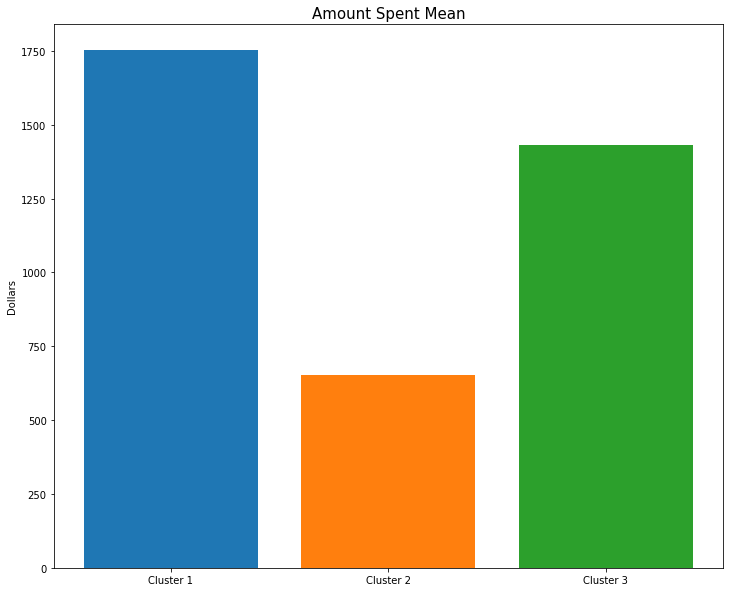

In [22]:
mean1 = cluster1['AmountSpent'].mean()
mean2 = cluster2['AmountSpent'].mean()
mean3 = cluster3['AmountSpent'].mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# create figure
fig, ax = plt.subplots(figsize = (12,10))


ax.set_title('Amount Spent Mean', fontsize=15)
ax.set_ylabel('Dollars')

ax.bar(labels[0], mean1)
ax.bar(labels[1], mean2)
ax.bar(labels[2], mean3)

plt.show()

# KNN

## Optimal Values of K

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# assign inputs and target variable
X = df_clusters3_norm.iloc[:,0:-1]
y = df_clusters3_norm.iloc[:,-1]

In [25]:
# create grid search
knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid={'n_neighbors': np.arange(1,20)}, cv=5)

In [26]:
# fit the model
knn_grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [27]:
# best params
knn_grid.best_params_

{'n_neighbors': 1}

##  KNN Train/Test

In [28]:
# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [29]:
train_accuracy = []
validation_accuracy = []
for k in range(1,10):
    knn_model1 = KNeighborsClassifier(n_neighbors=k)
    knn_model1.fit(X_train, y_train)
    train_accuracy.append(knn_model1.score(X_train, y_train))
    validation_accuracy.append(knn_model1.score(X_test, y_test))

In [30]:
frame = pd.DataFrame({'k':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame

,k,train_acc,valid_acc
0,1,1.000000,1.000
1,2,1.000000,0.988
2,3,1.000000,0.992
3,4,0.998667,0.992
4,5,0.998667,0.992
5,6,0.998667,0.992
6,7,1.000000,0.992
7,8,1.000000,0.992
8,9,1.000000,0.992


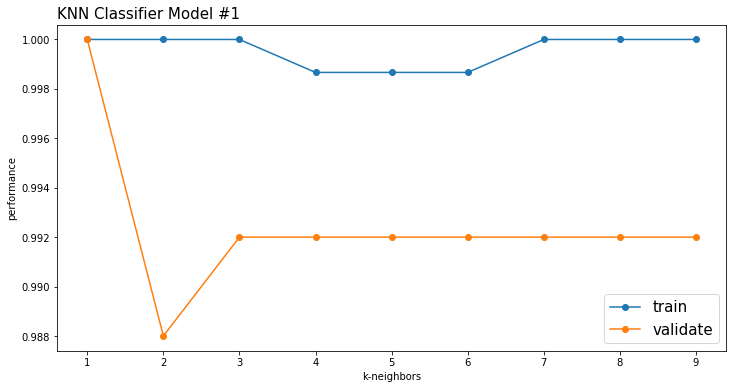

In [31]:
# plot differences

plt.figure(figsize=(12,6))
plt.plot(frame['k'], frame['train_acc'], marker='o', label='train')
plt.plot(frame['k'], frame['valid_acc'], marker='o', label='validate')
plt.xlabel('k-neighbors')
plt.ylabel('performance')
plt.title('KNN Classifier Model #1', fontsize = 15, loc='left')

plt.legend(prop={'size':15})
plt.show()

In [32]:
# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

# create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 1)

# fit the classifier to the data
knn.fit(X_train, y_train)

# check accuracy on test data
knn.score(X_test, y_test)

1.0